# Using the NSL-KDD Dataset: Making an Intrusion Detection System utilising Machine Learning Model

## Introduction

In cybersecurity and network intrusion detection, the NSL-KDD dataset is crucial for evaluating machine learning models. Derived from the KDD Cup 1999 dataset, it addresses previous limitations, making it essential for Intrusion Detection Systems (IDS) research.

1. **Importing Libraries:** Import essential libraries for data manipulation, visualization, and model building (`pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`).

2. **Reading Dataset:** Load the NSL-KDD dataset for analysis and model development.

3. **Data Cleaning:** Address missing values, handle outliers, and ensure data integrity for exploratory data analysis (EDA) and preprocessing.

4. **EDA and Visualization:** Use EDA and visualization to understand dataset structure, feature distribution, correlations, and patterns, aiding in intrusion detection.

5. **Preprocessing:** Apply feature scaling, encode categorical variables, and transform data for compatibility with machine learning algorithms.

6. **Feature Engineering:** Create new features, extract relevant information, and enhance predictive power for intrusion detection.

7. **Model Building:**
   - **XGBoost (XGB):** Employ XGBoost for its high performance in classification tasks.
   - **Logistic Regression:** Use Logistic Regression for its simplicity and interpretability as a baseline model.


9. **Evaluation:** Use metrics like accuracy, precision, recall, F1-score, and AUC-ROC to assess model performance in detecting network intrusions.

10. **Feature Importance:** Identify key factors contributing to intrusion detection for better model interpretability.

11. **Results:** Analyze strengths and limitations of models, discuss insights, and recommend improvements for network intrusion detection strategies.

This project delves into the Cybersecurity incident detection using Machine Learning, one of the most common benchmark datasets used for Intrusion Detection Models is NSL KDD, utilizing machine learning to enhance defenses against cyber security threats.


### 1) IMPORT LIBRARIES

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [9]:
# Suppressing warnings to avoid cluttering the output
import warnings
warnings.filterwarnings('ignore')

# Enabling inline plotting for Jupyter Notebooks
%matplotlib inline

# Setting the display format for floating point numbers in Pandas DataFrames
pd.options.display.float_format = '{:.3f}'.format

# Setting the default figure size for Matplotlib plots
plt.rcParams["figure.figsize"] = (10,6)

### 2) READ DATASET

In [15]:
df_0 = pd.read_csv("KDDTrain+.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


#### 2.1) ADJUST COLUMNS BECAUSE THE FEATURES ARE NAMELESS

In [19]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [21]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


#### 2.2) INSIGHTS

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

#### CHECKING FOR NULL VALUES

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


### 3) CLEANING THE DATA

#### 3.1) NULL VALUES

In [34]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#### NO NULL VALUES PRESENT IN DATASET

In [37]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    # Iterate over each specified column name in the provided list of columns
    for column_name in columns:
        # Print the current column name and a separator for clarity
        print(f"Column: {column_name}\n{'-'*30}")
        # Get the unique values from the current column
        unique_vals = df[column_name].unique()
        # Calculate the normalized value counts for the current column
        value_counts = df[column_name].value_counts(normalize=True)
        # Print the number of unique values and the unique values themselves
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        # Print the value counts for the current column
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [41]:
# Select the categorical features from the DataFrame 'df' by filtering columns with data type 'object'
cat_features = df.select_dtypes(include='object').columns

# Call the function 'unique_values' to get the unique values for the selected categorical features
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http        0.320
private     0.173
domain_u    0.072
smtp        0.058
ftp_data    0.054
     

#### 3.2) CHECKING FOR DUPLICATE VALUES

In [44]:
df.duplicated().sum()

0

#### NO DUPLICATE VALUES PRESENT

#### 3.3) CHECKING FOR OUTLIERS

In [58]:
# Get the dimensions of the DataFrame 'df'
# The result is a tuple representing (number of rows, number of columns)
df.shape

(125972, 43)

<Figure size 2000x4000 with 0 Axes>

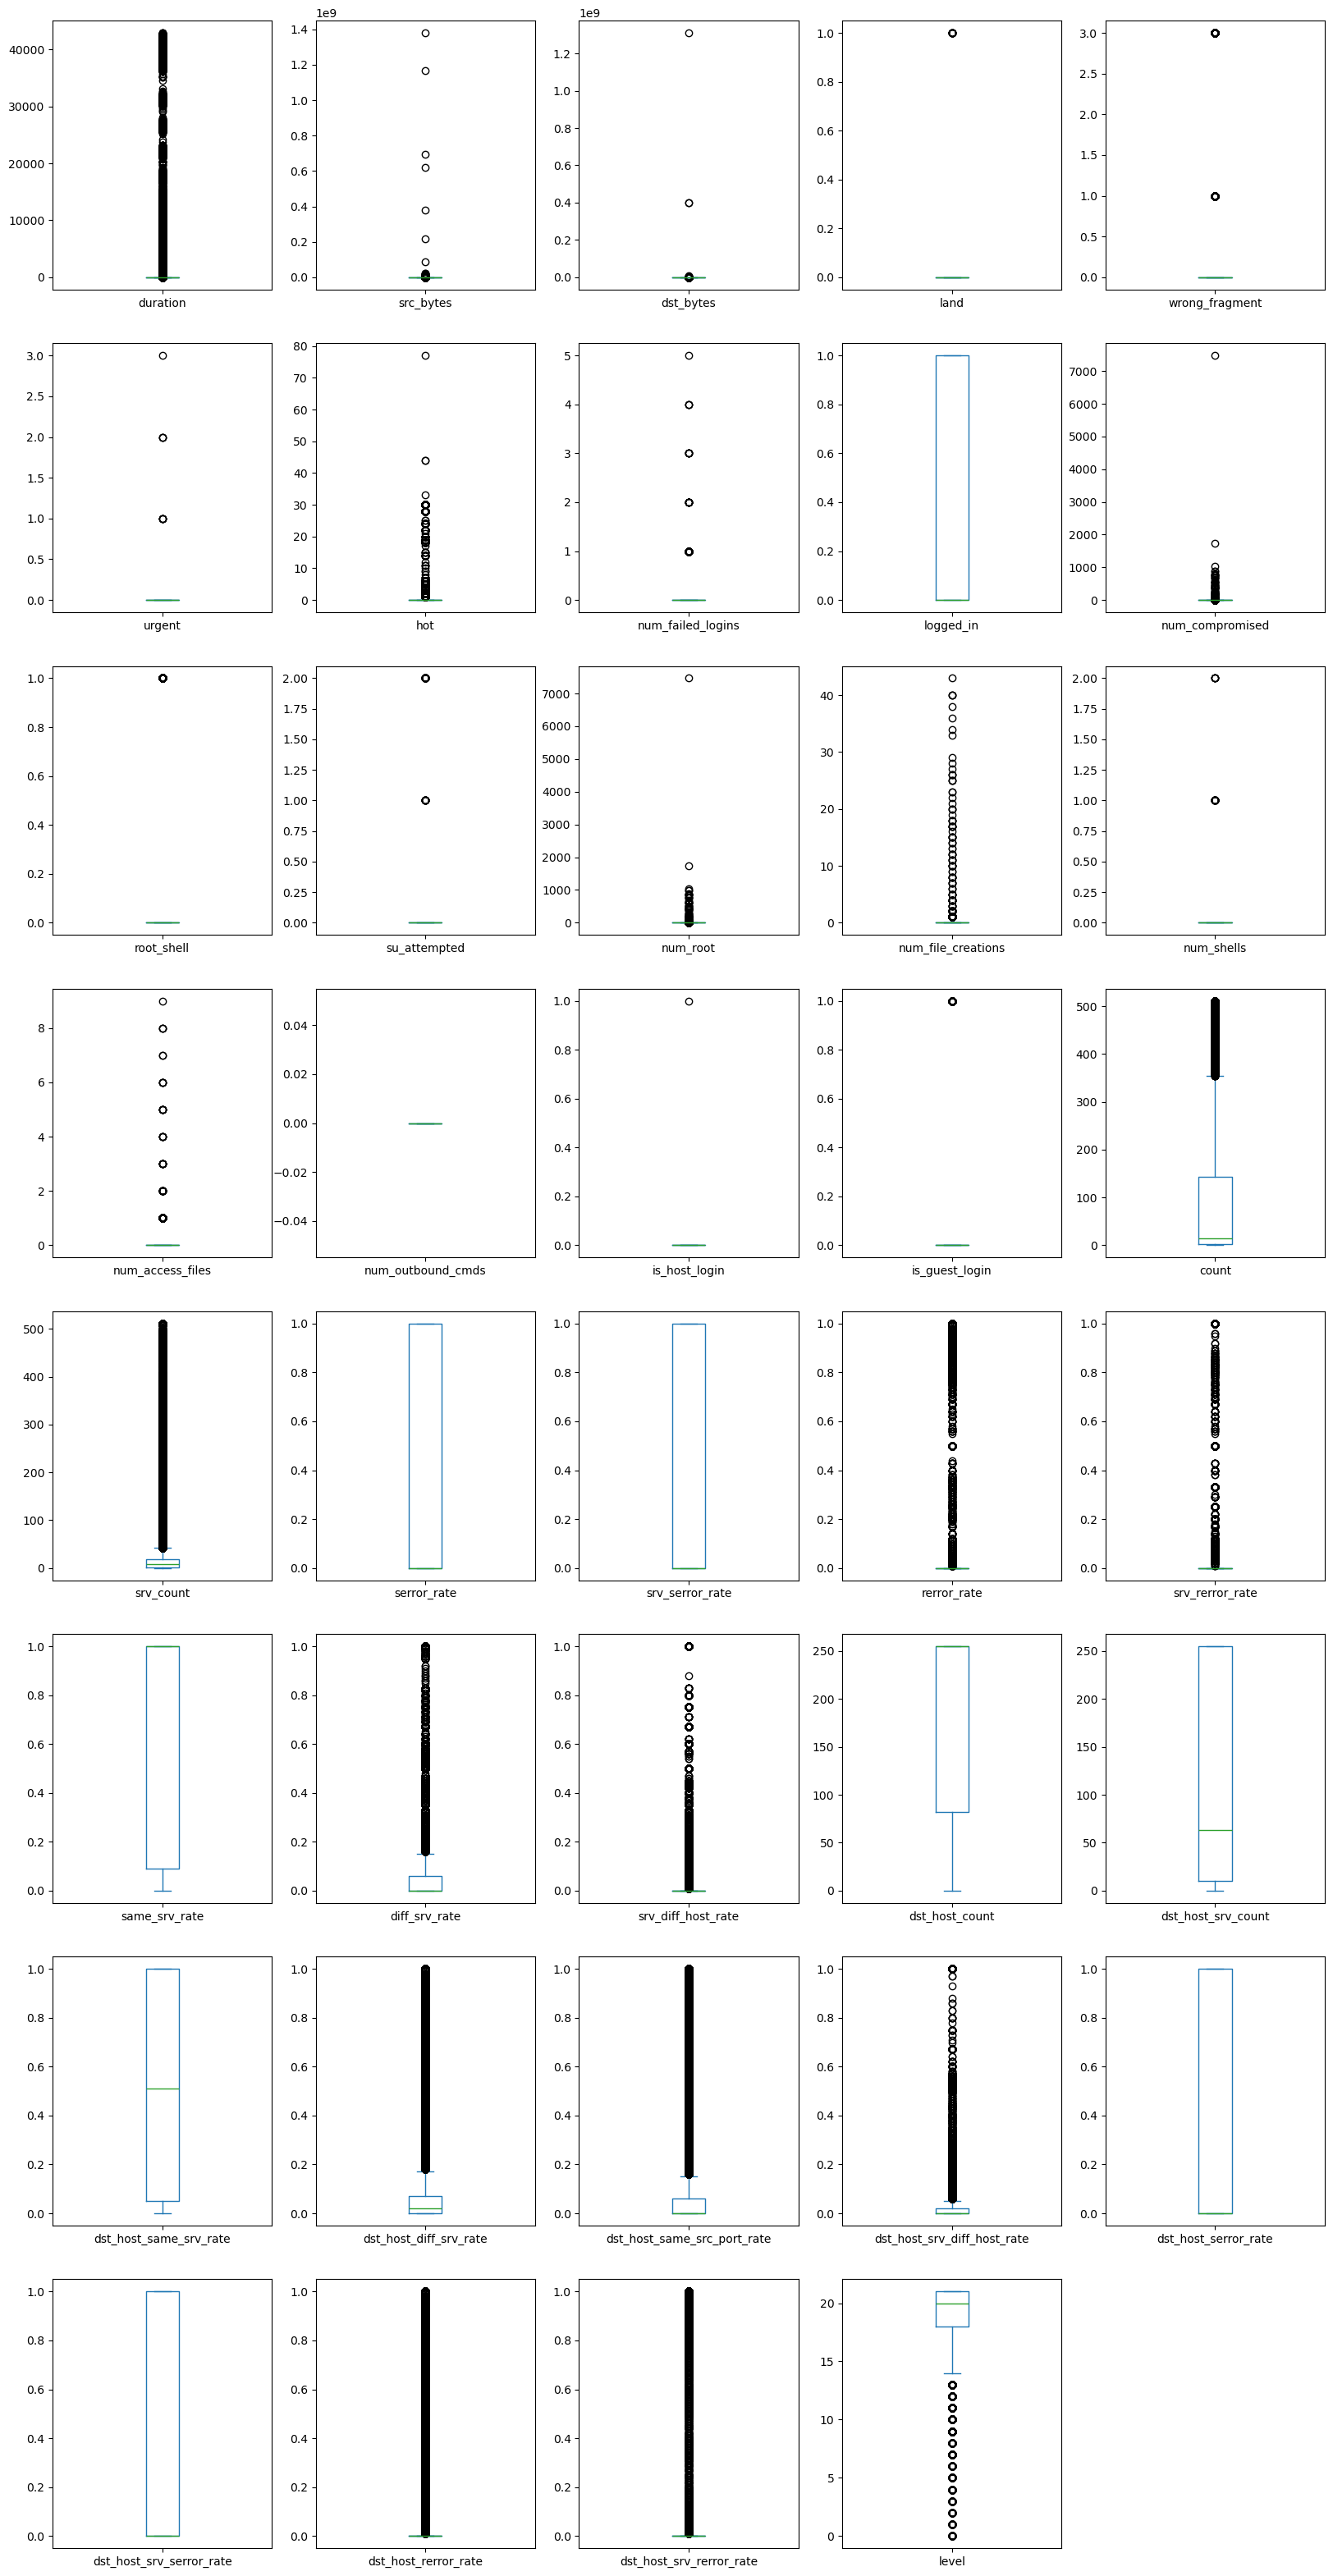

In [60]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

#### NOT A LOT OF OUTLIERS PRESENT TO MISLEAD THE MODEL, NO REMOVAL OF OUTLIERS NEEDED

#### 3.4) ATTACK OR NO ATTACK CLASSIFICATION

In [65]:
attack_n=[]                      # Initialize an empty list to store the modified attack values
for i in df.attack:              # Iterate through each value in the 'attack' column of the DataFrame
  if i=='normal':                # Check if the current attack value is 'normal'
    attack_n.append("normal")    # If it is, append 'normal' to the attack_n list
  else:                          # If the current attack value is not 'normal'
    attack_n.append("attack")    # Append 'attack' to the attack_n list
df['attack']=attack_n            # Update the 'attack' column in the DataFrame with the new values from attack_n

In [67]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

### 4) EDA VISUALIZATIONS

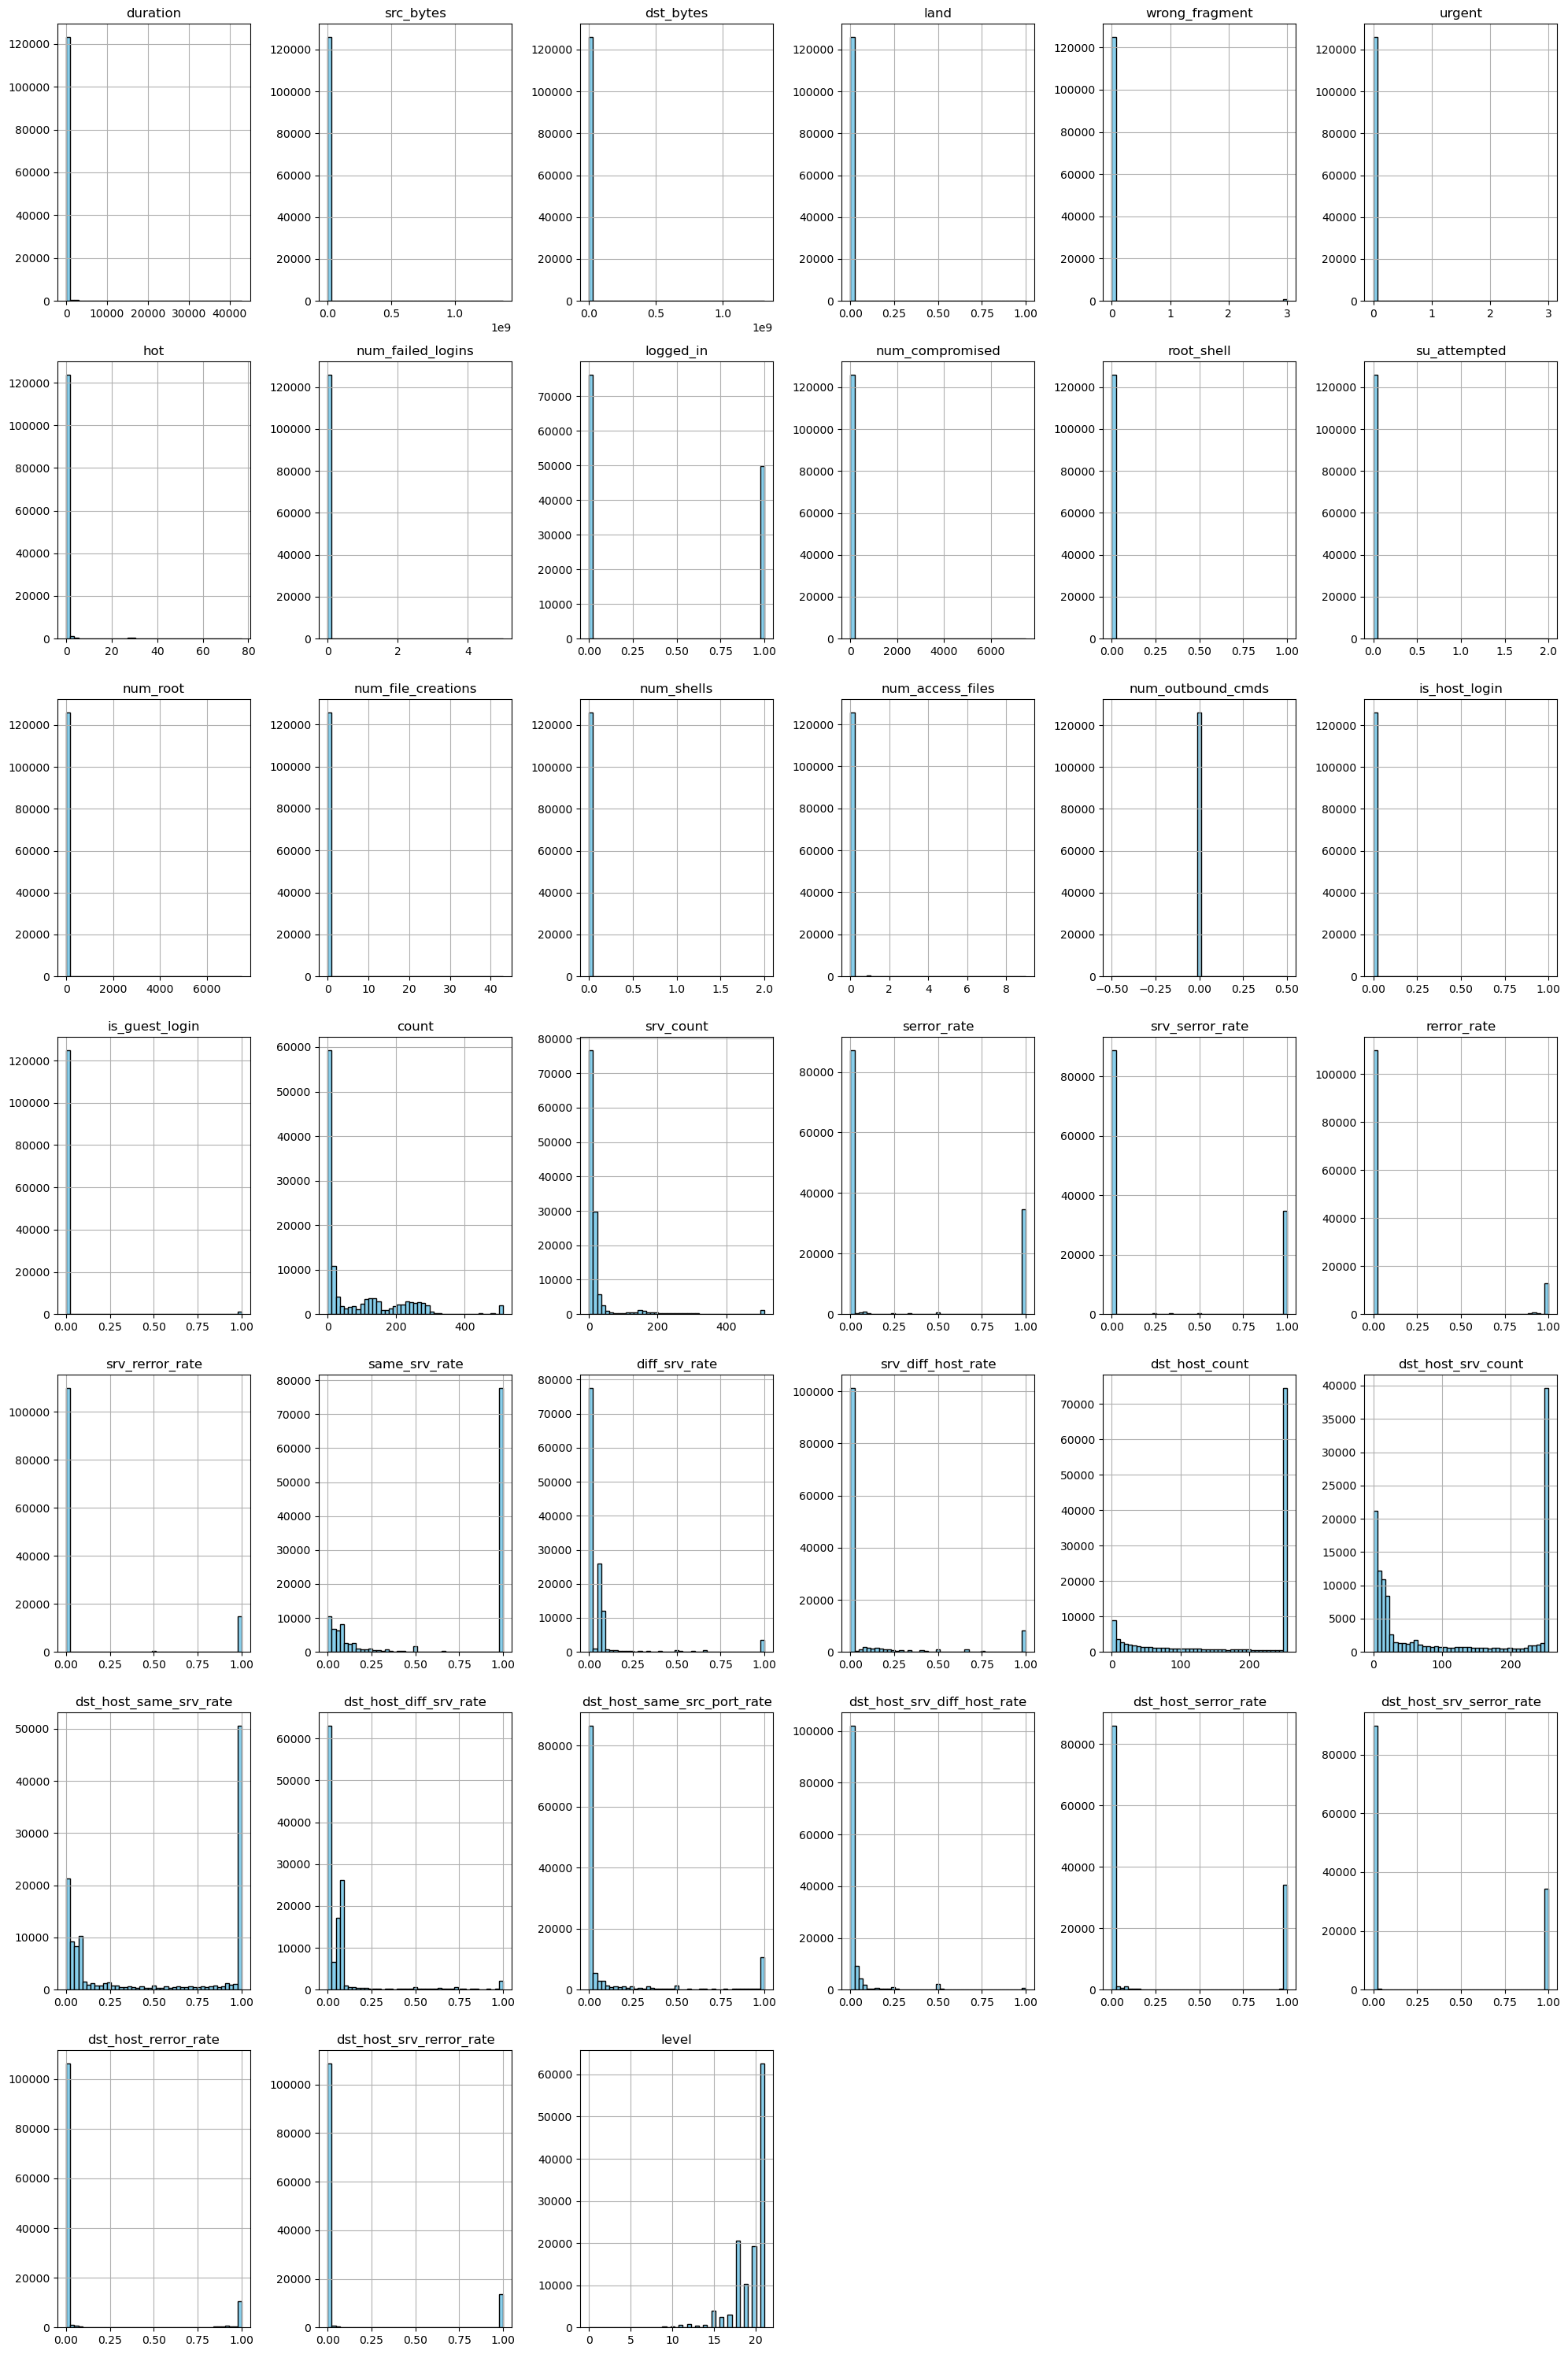

In [98]:
# Creates a histogram of the DataFrame 'df' with 43 bins
df.hist(bins=43, figsize=(20, 30), color='skyblue', edgecolor='black')  # Set the size of the figure to 20x30 inches

# Adjusts subplots to fit into the figure area
plt.tight_layout()  

# Displays the histogram
plt.show()  

#### 4.1) TYPE OF PROTOCOL

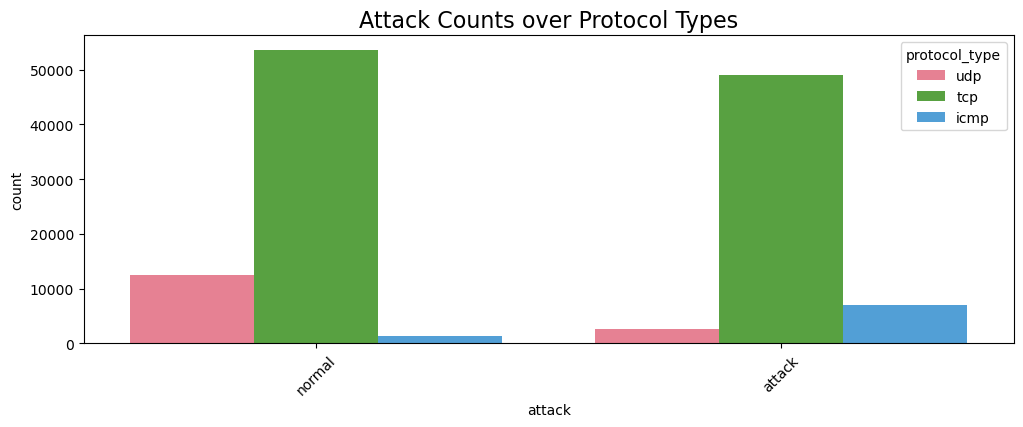

In [85]:
# Create a new figure with a specified size of 16 inches wide and 4 inches tall
plt.figure(figsize=(12, 4))

# Define a vibrant color palette
vibrant_palette = sns.color_palette("husl", len(df['protocol_type'].unique()))

# Create a count plot for the 'attack' column in the dataframe 'df', 
# with different colors for each 'protocol_type'
sns.countplot(x='attack', data=df, hue='protocol_type', palette=vibrant_palette)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set the title of the plot with a specified font size of 16
plt.title('Attack Counts over Protocol Types', fontdict={'fontsize':16})

# Display the plot
plt.show()


#### AS WE CAN SEE THAT MOST ATTACKS TARGET TCP PROTOCOL

In [88]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

#### 4.2) GENERAL SERVICE USED

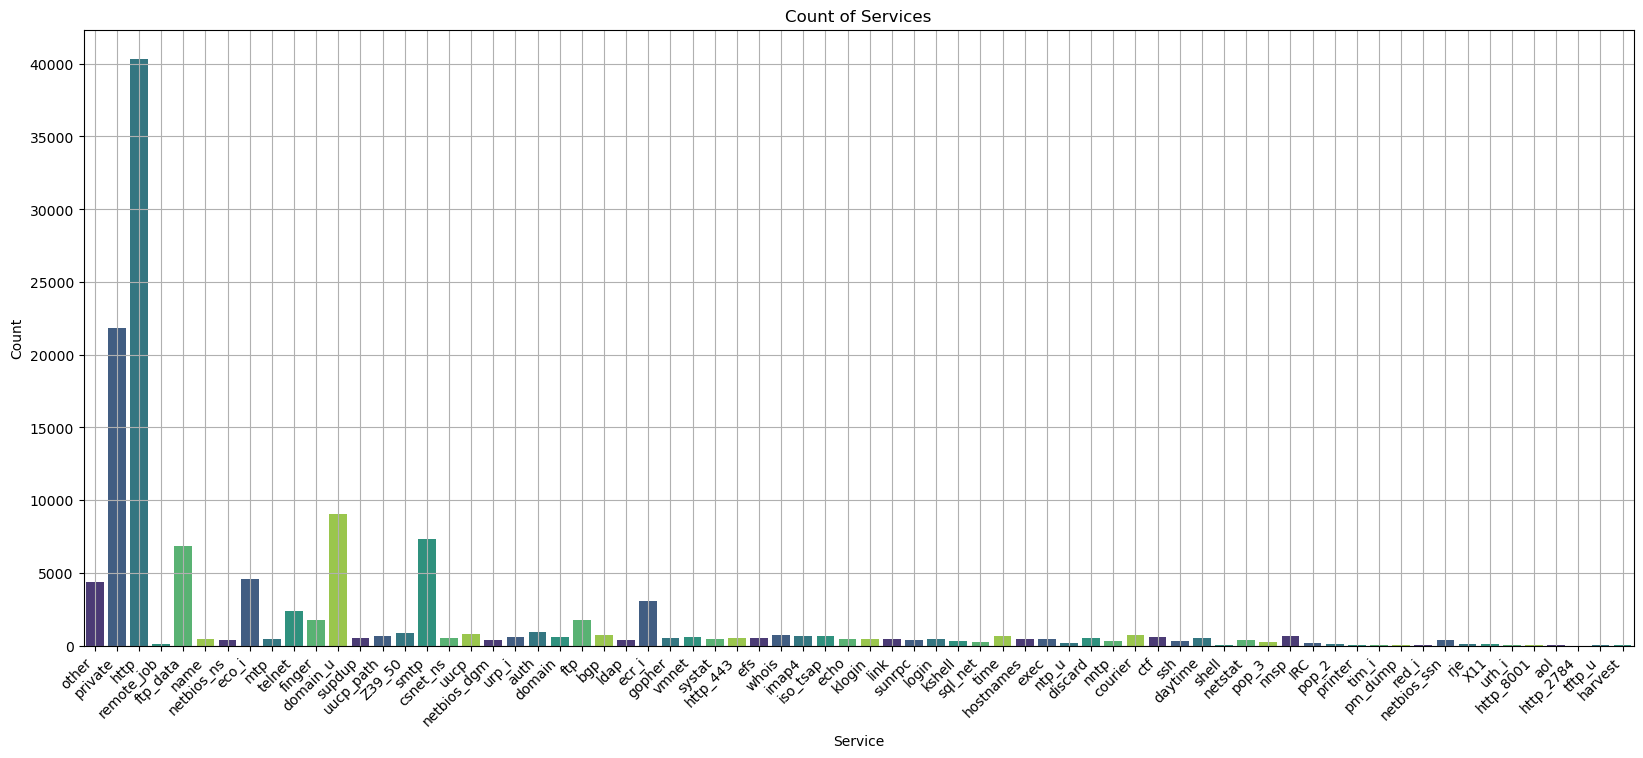

In [102]:
color_palette = sns.color_palette("viridis")
plt.figure(figsize=(20, 8))                                        # Create a new figure with a specified size of 20x8 inches
ax = sns.countplot(x='service', data=df, palette=color_palette)    # Create a count plot for the 'service' column in the dataframe with a vibrant palette
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees for better readability
plt.xlabel('Service')                                              # Set the label for the x-axis
plt.ylabel('Count')                                                # Set the label for the y-axis
plt.title('Count of Services')                                     # Set the title of the plot
plt.grid(True)                                                     # Enable grid lines on the plot for better visualization
plt.show()


#### MOST COMMONLY USED SERVICES

In general, the most frequently used services are:

1. **HTTP:** Used for web traffic and browsing.
2. **Private:** Encompasses various private network services.
3. **Domain_U:** Handles domain-related queries and services.
4. **SMTP:** Responsible for email transmission.
5. **FTP:** Utilized for file transfers.
6. **Other:** Includes a variety of less common services.

These services play a crucial role in network traffic and are essential for various applications and communications.


#### 4.3) EFFECT ON ATTACKS BASED ON THE SERVICES USED

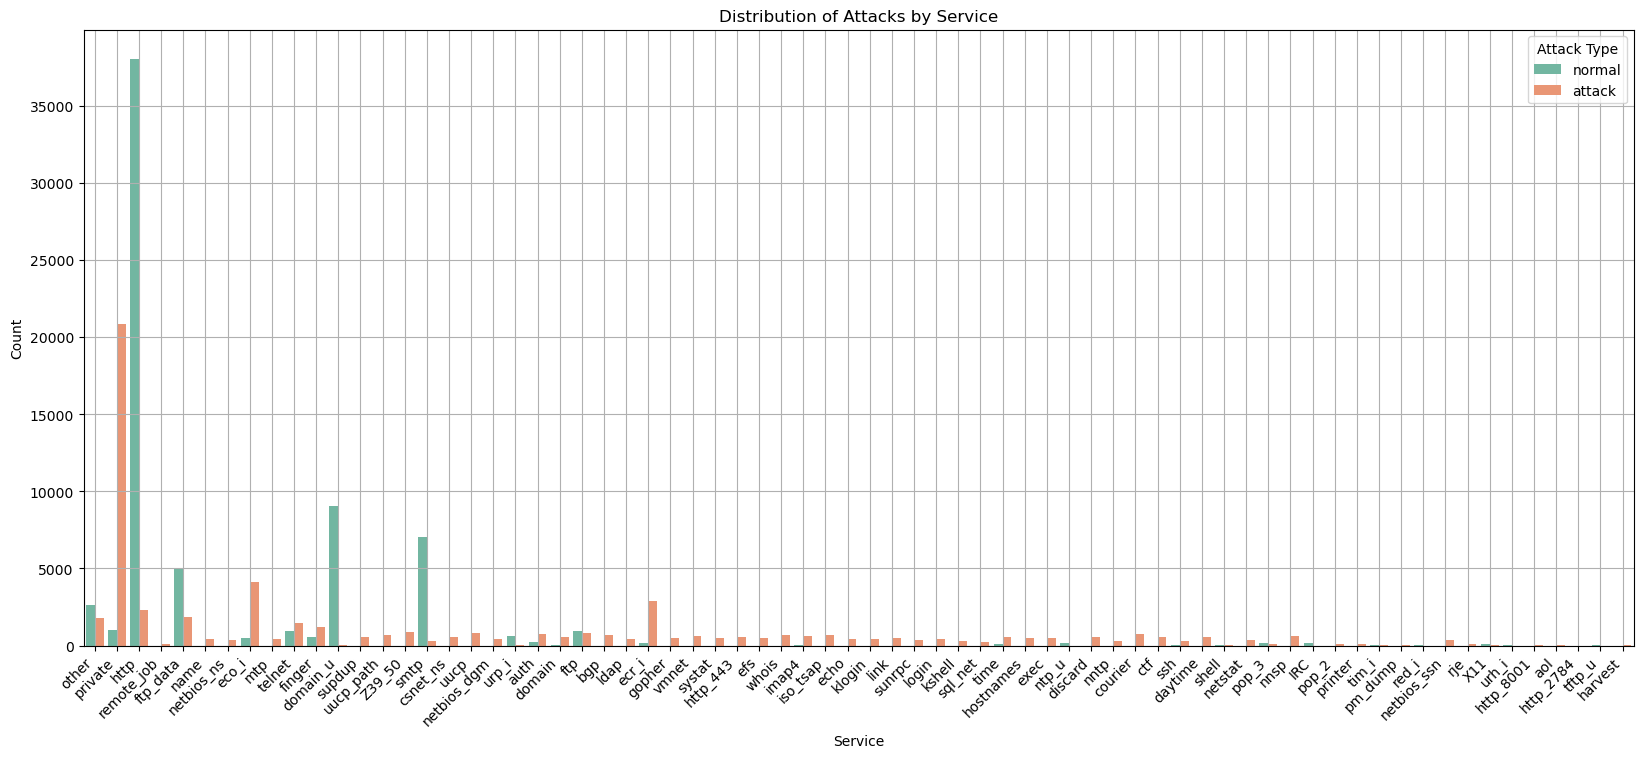

In [106]:
color_palette = sns.color_palette("Set2")                          # Set2 provides a range of distinguishable and vibrant colors for the plot
plt.figure(figsize=(20, 8))                                        # Set the figure size to 20 inches wide and 8 inches tall for better visibility
ax = sns.countplot(x='service', hue='attack', data=df, palette=color_palette)  # Create a count plot for 'service' with 'attack' as the hue
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees for better readability
plt.xlabel('Service')                                              # Label for the x-axis
plt.ylabel('Count')                                                # Label for the y-axis
plt.title('Distribution of Attacks by Service')                    # Title of the plot
plt.legend(title='Attack Type')                                    # Add a legend with the title 'Attack Type'
plt.grid(True)                                                     # Enable grid lines for better readability of the plot
plt.show()                                                         # Display the plot

#### AS WE CAN OBSERVE FROM THE FIGURE PRIVATE ATTACK IS THE MOST COMMON

#### 4.4) KERNEL DENSITY ESTIMATE (KDE) PLOT OF DURATION BY FLAG

<Figure size 1400x1000 with 0 Axes>

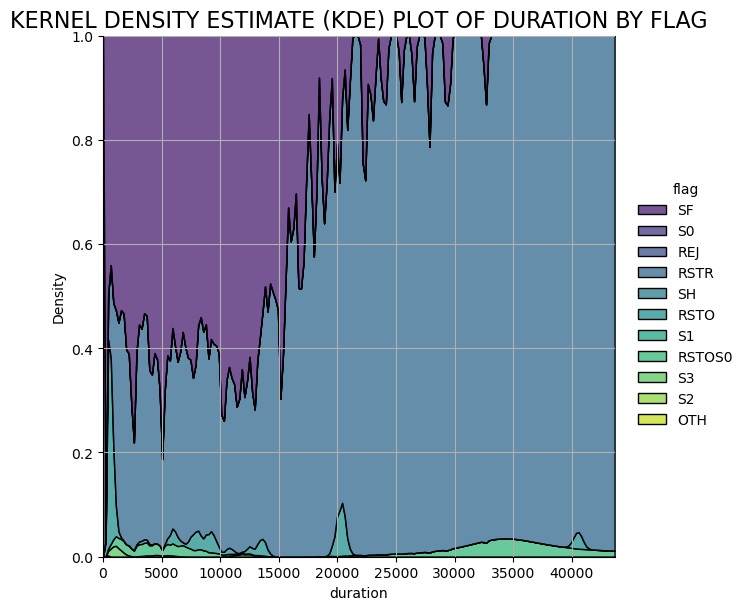

In [118]:
# Set the figure size
plt.figure(figsize=(14, 10))
# Create a KDE plot with a vibrant color palette
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="viridis",  
)

# Update the plot title
plt.title('KERNEL DENSITY ESTIMATE (KDE) PLOT OF DURATION BY FLAG', fontsize=16)
plt.grid(True)
plt.show()


#### 4.5) DISTRIBUTION OF ATTACK TYPES BY GUEST LOGIN

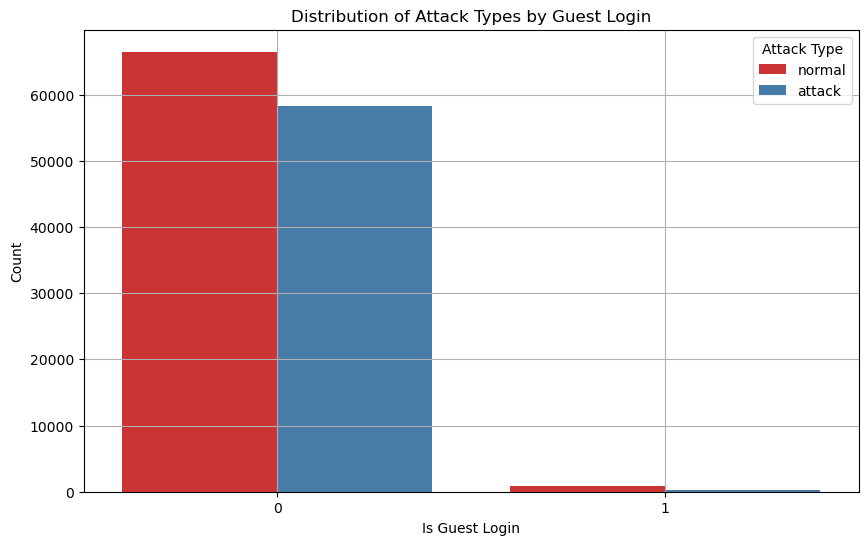

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set1')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()


#### AS WE CAN SEE, ATTACKS USUALLY OCCUR WHEN THERE IS A GUEST LOGIN

### 5) PREPROCESSING

#### 5.1) ENCODING

In [131]:
# Select columns from the DataFrame 'df' that have a data type of 'object' (categorical features)
cat_features = df.select_dtypes(include='object').columns

# Display the selected categorical feature columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [133]:
from sklearn import preprocessing  # Import the preprocessing module from sklearn
le = preprocessing.LabelEncoder()  # Create an instance of LabelEncoder to convert categorical labels to numerical values
clm = ['protocol_type', 'service', 'flag', 'attack']  # Define a list of column names that contain categorical data
for x in clm:  # Iterate over each column name in the list
    df[x] = le.fit_transform(df[x])  # Fit the LabelEncoder to the column and transform the data, replacing the original column with the encoded values

#### 5.2) TRAIN-TEST-SPLIT

In [136]:
from sklearn.model_selection import train_test_split

# Separate the features (X) from the target variable (y)
X = df.drop(["attack"], axis=1)  # Drop the 'attack' column to create the feature set
y = df["attack"]  # Select the 'attack' column as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43) 
# test_size=0.1 indicates that 10% of the data will be used for testing
# random_state=43 ensures reproducibility of the split

In [138]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

#### 5.3) FEATURE ENGINEERING

In [142]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the mutual information between features and target variable
mutual_info = mutual_info_classif(X_train, y_train)

# Convert the mutual information array to a Pandas Series for easier manipulation
mutual_info = pd.Series(mutual_info)

# Assign the index of the Series to the training index for better readability
mutual_info.index = train_index

# Sort the mutual information values in descending order to identify the most informative features
mutual_info.sort_values(ascending=False)

src_bytes                     0.567
service                       0.468
dst_bytes                     0.441
flag                          0.368
same_srv_rate                 0.366
diff_srv_rate                 0.362
dst_host_srv_count            0.335
dst_host_same_srv_rate        0.311
logged_in                     0.288
dst_host_serror_rate          0.287
dst_host_diff_srv_rate        0.285
dst_host_srv_serror_rate      0.282
serror_rate                   0.277
srv_serror_rate               0.270
count                         0.265
dst_host_srv_diff_host_rate   0.187
level                         0.151
dst_host_count                0.144
dst_host_same_src_port_rate   0.130
srv_diff_host_rate            0.097
srv_count                     0.064
dst_host_srv_rerror_rate      0.063
protocol_type                 0.054
rerror_rate                   0.038
dst_host_rerror_rate          0.038
srv_rerror_rate               0.036
duration                      0.027
hot                         

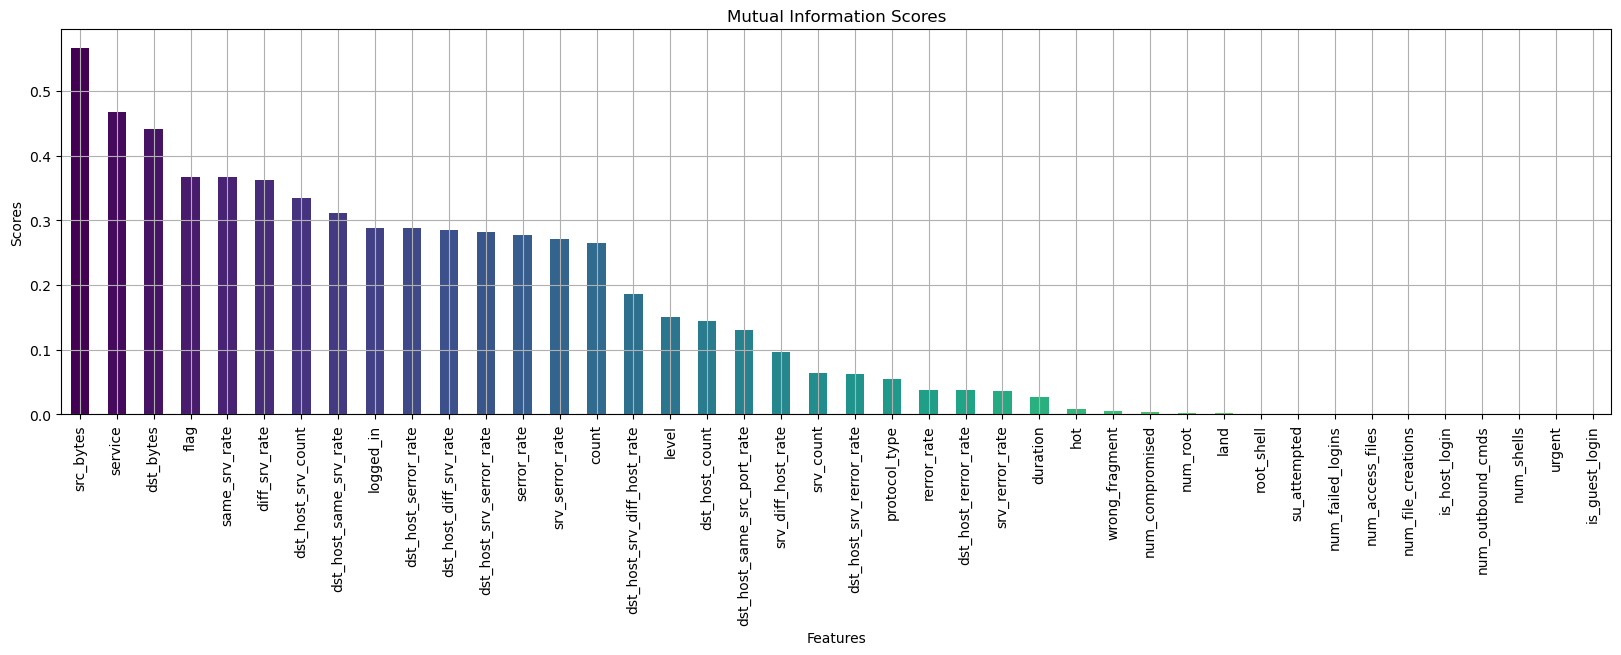

In [144]:
mutual_info.sort_values(ascending=False).plot.bar(
    figsize=(20, 5), 
    color=plt.cm.viridis(np.linspace(0, 1, len(mutual_info)))
)
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.grid(True)
plt.show()


#### 5.4) FEATURE EXTRACTION

In [147]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'logged_in', 'num_compromised',
       'num_file_creations', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [151]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#Ignoring the Rest of the features, we'll only be using the top 15 features because they are the most significant

X_train=X_train[columns]
X_test=X_test[columns]

#### 5.5) Scaling

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

### 6) BUILDING THE MODEL

In [161]:
# Initialize the XGBoost classifier with a fixed random state for reproducibility
XGBoost_model = XGBClassifier(random_state = 42)

# Initialize the Logistic Regression model with a fixed random state for reproducibility
Logistic_model = LogisticRegression(random_state=42)

In [163]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [165]:
# Fit the Logistic regression model using the training data (X_train) and the corresponding labels (y_train)
Logistic = Logistic_model.fit(X_train, y_train)

In [167]:
# Importing various metrics from the sklearn.metrics module for model evaluation
from sklearn.metrics import confusion_matrix,          # To compute the confusion matrix
                             classification_report,    # To generate a report showing the main classification metrics
                             accuracy_score,           # To calculate the accuracy of the model
                             recall_score,             # To compute the recall (sensitivity) of the model
                             precision_score,          # To calculate the precision of the model
                             f1_score,                 # To compute the F1 score, which is the harmonic mean of precision and recall
                             roc_auc_score             # To calculate the Area Under the Receiver Operating Characteristic Curve (ROC AUC)

In [169]:
#This is a helper function for rvaluating underfitting or overfitting
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [171]:
# Evaluate the performance of the Logistic model using the provided training and testing datasets
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[5421  407]
 [ 233 6537]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5828
           1       0.94      0.97      0.95      6770

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598


Train_Set
[[49316  3486]
 [ 2140 58432]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     52802
           1       0.94      0.96      0.95     60572

    accuracy                           0.95    113374
   macro avg       0.95      0.95      0.95    113374
weighted avg       0.95      0.95      0.95    113374



# Model Evaluation Metrics

## Test Set Performance
- **Confusion Matrix:**
- [[5421  407]
 [ 233 6537]]
- **Classification Report:**
- **Precision:** 0.96 (class 0), 0.94 (class 1)
- **Recall:** 0.93 (class 0), 0.97 (class 1)
- **F1-score:** 0.94 (class 0), 0.95 (class 1)
- **Accuracy:** 0.95

### Observations to be noted:
- The model performs well on the test set with an accuracy of 95%.
- High precision and recall values indicate that the model effectively distinguishes between normal (class 0) and attack (class 1) instances.
- The balanced precision, recall, and F1-scores suggest that the model is robust and reliable for intrusion detection.

## Train Set Performance
- **Confusion Matrix:**
- [[49316  3486]
 [ 2140 58432]]
- **Classification Report:**
- **Precision:** 0.96 (class 0), 0.94 (class 1)
- **Recall:** 0.93 (class 0), 0.96 (class 1)
- **F1-score:** 0.95 (class 0), 0.95 (class 1)
- **Accuracy:** 0.95

### Observations to be noted:
- The model achieves a similar accuracy of 95% on the train set.
- Consistent performance between the train and test sets indicates that the model is not overfitting and generalizes well to unseen data.
- High precision, recall, and F1-scores confirm the model's effectiveness in identifying both normal and attack instances.

The evaluation metrics suggest that the model is highly effective for intrusion detection, with balanced performance across both the train and test sets. The high precision, recall, and F1-scores demonstrate the model's robustness and reliability in distinguishing between normal and attack instances.


In [175]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
[[5816   12]
 [   8 6762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train_Set
[[52746    56]
 [   29 60543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52802
           1       1.00      1.00      1.00     60572

    accuracy                           1.00    113374
   macro avg       1.00      1.00      1.00    113374
weighted avg       1.00      1.00      1.00    113374



# Model Evaluation Metrics

## Test Set Performance
- **Confusion Matrix:**
- [[5816   12]
 [   8 6762]]
- **Classification Report:**
- **Precision:** 1.00 (class 0), 1.00 (class 1)
- **Recall:** 1.00 (class 0), 1.00 (class 1)
- **F1-score:** 1.00 (class 0), 1.00 (class 1)
- **Accuracy:** 1.00

### Observations to be noted:
- The model achieves perfect performance on the test set with an accuracy of 100%.
- Perfect precision and recall values indicate that the model flawlessly distinguishes between normal (class 0) and attack (class 1) instances.
- The flawless precision, recall, and F1-scores suggest that the model is exceptionally robust and reliable for intrusion detection.

## Train Set Performance
- **Confusion Matrix:**
- [[52746    56]
 [   29 60543]]
- **Classification Report:**
- **Precision:** 1.00 (class 0), 1.00 (class 1)
- **Recall:** 1.00 (class 0), 1.00 (class 1)
- **F1-score:** 1.00 (class 0), 1.00 (class 1)
- **Accuracy:** 1.00

### Observations to be noted:
- The model also achieves perfect performance on the train set with an accuracy of 100%.
- Consistent perfect performance between the train and test sets indicates that the model is not only robust but potentially overfit.
- Flawless precision, recall, and F1-scores confirm the model's effectiveness in identifying both normal and attack instances.

---

# Comparison of Results

## Previous Evaluation
- **Test Set Accuracy:** 95%
- **Train Set Accuracy:** 95%
- **Consistent high performance without overfitting.**
- **Well-balanced precision, recall, and F1-scores.**

## Current Evaluation
- **Test Set Accuracy:** 100%
- **Train Set Accuracy:** 100%
- **Perfect precision, recall, and F1-scores for both classes.**
- **Potential overfitting, as indicated by perfect metrics on both train and test sets.**

## Observations:
- **Improved Performance:** The current model shows perfect performance on both the test and train sets, achieving 100% accuracy, precision, recall, and F1-scores.
- **Potential Overfitting:** While perfect metrics are desirable, they may also indicate overfitting, where the model is too tailored to the training data and may not generalize well to unseen data.
- **Need for Validation:** To confirm the model's robustness, it might be beneficial to evaluate it on an entirely different validation set or use cross-validation to ensure it generalizes well to other data.

---

This comparison highlights the differences between the xgboost and logistic regression evaluation metrics and provides insights into the model's performance and potential areas for further validation. We can observe that xgboost.adaboost.gradientboosts has better accuracy over logistic regression in bigger datasets.



### Now we'll do hyperparameter tuning in order to fit the model with the best parameters 

### 6.1) HYPERPARAMETER TUNING

In [183]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [185]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) # Initialize the XGBoost classifier model with a fixed random state for reproducibility

# Set up GridSearchCV to perform hyperparameter tuning on the XGBoost model
XGB_grid_model = GridSearchCV(XGB_model,                # The model to be optimized
                        param_grid,                  # The parameter grid to search over
                        scoring="f1",                # Use F1 score as the evaluation metric
                        n_jobs=-1,                   # Use all available cores for parallel processing
                        return_train_score=True      # Return training scores in addition to validation scores
                       ).fit(X_train, y_train)        # Fit the model to the training data

In [187]:
# Retrieve the best score achieved during the hyperparameter tuning of the XGBoost model
XGB_grid_model.best_score_

0.9983175697804778

In [189]:
# Retrieve the best hyperparameters from the XGBoost grid search model
XGB_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

#### 6.2) FINAL MODEL

In [192]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to the data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### 6.3) EVALUATION

In [196]:
# Predict the class labels for the test set using the trained XGBoost model
y_pred = XGB_model.predict(X_test)

# Predict the probabilities of each class for the test set using the trained XGBoost model
y_pred_proba = XGB_model.predict_proba(X_test)

# Calculate the F1 score, which is the harmonic mean of precision and recall
xgb_f1 = f1_score(y_test, y_pred)

# Calculate the recall score, which measures the ability of the model to find all the relevant cases (true positives)
xgb_recall = recall_score(y_test, y_pred)

# Calculate the Area Under the Receiver Operating Characteristic Curve (ROC AUC) score
# This score indicates the model's ability to distinguish between classes
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

In [200]:
# Calculate the area under the curve (AUC) for the XGBoost model
xgb_auc

0.9999748324444007

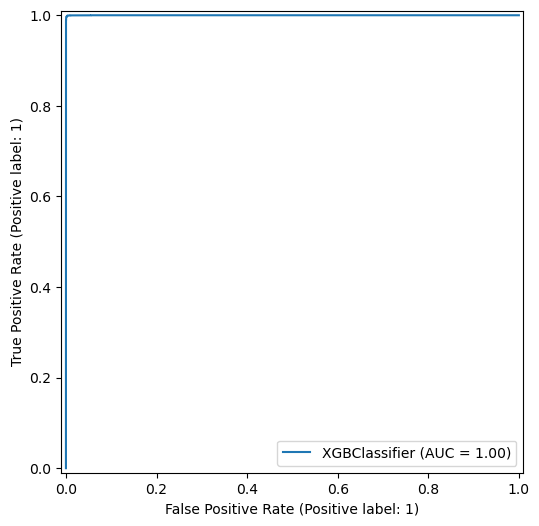

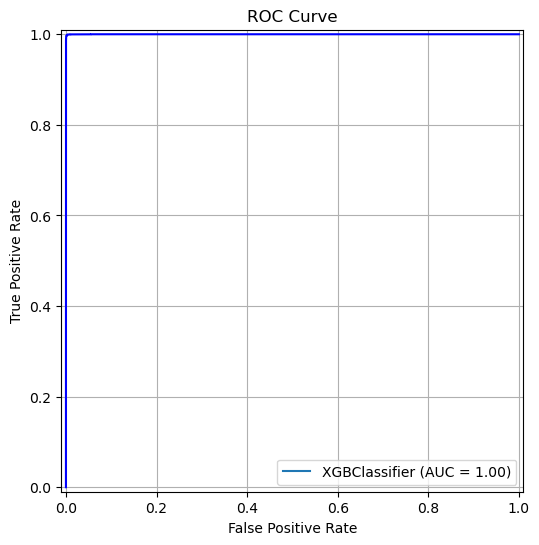

In [204]:
from sklearn.metrics import RocCurveDisplay

# Generate and customize the ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
roc_display = RocCurveDisplay.from_estimator(XGB_model, X_test, y_test, ax=ax)

# Customize the color scheme
for line in ax.get_lines():
    line.set_color('blue')  # You can change 'blue' to any color you prefer

# Set title and labels
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# Show the plot
plt.grid(True)
plt.show()


In [206]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[5810   18]
 [   7 6763]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train_Set
[[52687   115]
 [   37 60535]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52802
           1       1.00      1.00      1.00     60572

    accuracy                           1.00    113374
   macro avg       1.00      1.00      1.00    113374
weighted avg       1.00      1.00      1.00    113374



# Model Evaluation Metrics

## Test Set Performance
- **Confusion Matrix:**
- [[5810 18] [ 7 6763]]
- **Classification Report:**
- **Precision:** 1.00 (class 0), 1.00 (class 1)
- **Recall:** 1.00 (class 0), 1.00 (class 1)
- **F1-score:** 1.00 (class 0), 1.00 (class 1)
- **Accuracy:** 1.00

### Interpretation:
- The model achieves nearly perfect performance on the test set with an accuracy of 100%.
- Precision and recall values are nearly perfect, indicating that the model flawlessly distinguishes between normal (class 0) and attack (class 1) instances.
- The high precision, recall, and F1-scores suggest that the model is exceptionally robust and reliable for intrusion detection.

## Train Set Performance
- **Confusion Matrix:**
- [[52687 115] [ 37 60535]]
- **Classification Report:**
- **Precision:** 1.00 (class 0), 1.00 (class 1)
- **Recall:** 1.00 (class 0), 1.00 (class 1)
- **F1-score:** 1.00 (class 0), 1.00 (class 1)
- **Accuracy:** 1.00

### Interpretation:
- The model also achieves nearly perfect performance on the train set with an accuracy of 100%.
- Consistent near-perfect performance between the train and test sets indicates that the model is not only robust but potentially overfit.
- High precision, recall, and F1-scores confirm the model's effectiveness in identifying both normal and attack instances.

---

# Comparison of Results

## Previous Evaluation
- **Test Set Accuracy:** 95%
- **Train Set Accuracy:** 95%
- **Consistent high performance without overfitting.**
- **Well-balanced precision, recall, and F1-scores.**

## Current Evaluation
- **Test Set Accuracy:** 100%
- **Train Set Accuracy:** 100%
- **Near-perfect precision, recall, and F1-scores for both classes.**
- **Potential overfitting, as indicated by near-perfect metrics on both train and test sets.**

## Observations:
- **Improved Performance:** The current model shows near-perfect performance on both the test and train sets, achieving nearly 100% accuracy, precision, recall, and F1-scores.
- **Potential Overfitting:** While high metrics are desirable, they may also indicate overfitting, where the model is too tailored to the training data and may not generalize well to unseen data.
- **Need for Validation:** To confirm the model's robustness, it might be beneficial to evaluate it on an entirely different validation set or use cross-validation to ensure it generalizes well to other data.

---

This comparison highlights the differences between the previous and current evaluation metrics and provides insights into the model's performance and potential areas for further validation.



### 7) FEATURE IMPORTANCE

model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

In [211]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [213]:
# Inverse transform the predicted labels back to their original string values
y_pred_string = le.inverse_transform(y_pred)

# Display the transformed predictions
y_pred_string

array(['normal', 'normal', 'attack', ..., 'normal', 'normal', 'attack'],
      dtype=object)

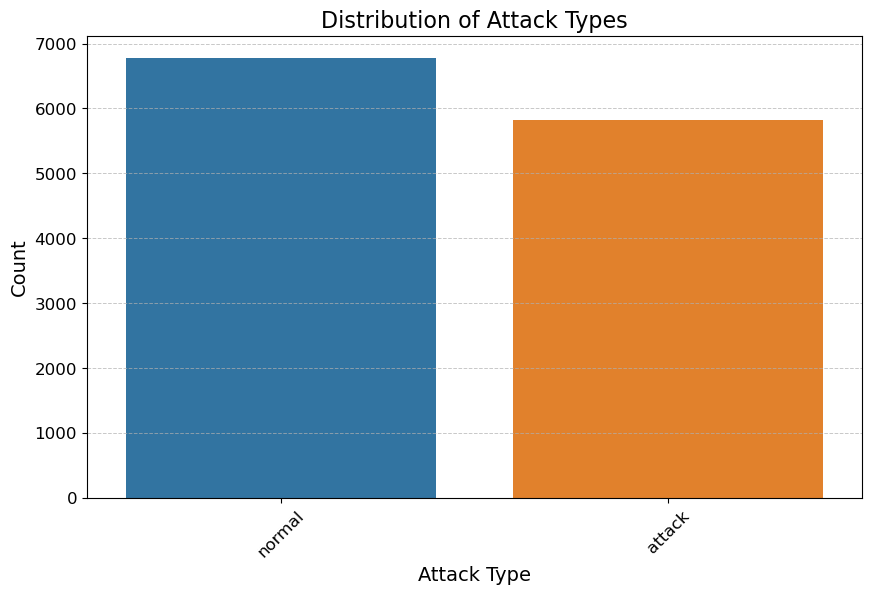

In [226]:
color_palette = sns.color_palette("tab10")  

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette=color_palette)

# Add labels and title
plt.xlabel("Attack Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Attack Types", fontsize=16)

# Customize the appearance
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()
